In [172]:
import warnings
warnings.filterwarnings('ignore')

## Cleaning, Combining, and Labeling Direction and Design

In [201]:
# Import module
import os
import pandas as pd
# Assign directory
directory = r"C:\Users\ab991130\Documents\GitHub\Afkhami-Data-Usage\In_plane_compressions"
df = pd.DataFrame(columns = ['Force','Displacement'])
# Iterate over files in directory
for path, folders, files in os.walk(directory):
    for filename in files:
        if filename.endswith('csv'):
            with open(os.path.join(directory, filename)) as f:

                #Extracting Features from filename
                Design = filename[0]
                Direction = filename[2]
                Displacement_Rate = filename[4:7]

                #Creating Temporary DataFrame
                tdf = pd.read_csv(filename,skiprows=2)
                tdf = tdf.drop(tdf.columns[2], axis=1)
                tdf = tdf.drop(tdf.columns[2], axis=1)
                tdf.columns=['Force', 'Displacement']

                tdf['Design'] = Design
                tdf['Direction'] = Direction
                tdf['Displacement Rate'] = Displacement_Rate
                
                df = pd.concat([df, tdf], ignore_index=True)
df

,Force,Displacement,Design,Direction,Displacement Rate
0,0.000064,-0.000149,A,X,0.1
1,-0.000355,-0.000122,A,X,0.1
2,0.004733,-0.000355,A,X,0.1
3,-0.001949,-0.000374,A,X,0.1
4,0.003855,-0.000237,A,X,0.1
...,...,...,...,...,...
108737,-190.590100,-26.780952,F,Y,1.8
108738,-190.616900,-26.782848,F,Y,1.8
108739,-190.604340,-26.783546,F,Y,1.8
108740,-190.614870,-26.785297,F,Y,1.8


## Changing all Cat data to Num for model 

In [202]:
# Convert categorical data to numerical data using replace
df['Design'] = df['Design'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5})
df['Direction'] = df['Direction'].replace({'X': 0, 'Y': 1})
df

,Force,Displacement,Design,Direction,Displacement Rate
0,0.000064,-0.000149,0,0,0.1
1,-0.000355,-0.000122,0,0,0.1
2,0.004733,-0.000355,0,0,0.1
3,-0.001949,-0.000374,0,0,0.1
4,0.003855,-0.000237,0,0,0.1
...,...,...,...,...,...
108737,-190.590100,-26.780952,5,1,1.8
108738,-190.616900,-26.782848,5,1,1.8
108739,-190.604340,-26.783546,5,1,1.8
108740,-190.614870,-26.785297,5,1,1.8


## Data split

In [203]:
y = df["Displacement"]
X = df.drop(columns = ["Displacement"])

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## Model Building

In [205]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [206]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [207]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [208]:
print('LR MSE (Train): ' , lr_train_mse)
print('LR R2 (Train): ' , lr_train_r2)
print('LR MSE (Test): ' , lr_test_mse)
print('LR MSE (Test): ' , lr_test_r2)

LR MSE (Train):  83.68264197674198
LR R2 (Train):  0.35372139741899744
LR MSE (Test):  83.30094230675422
LR MSE (Test):  0.3598271562803319


Text(0.5, 0, 'Experimental Displacement')

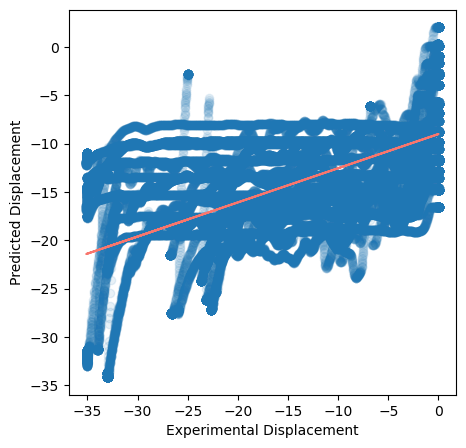

In [210]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.1)

z = np.polyfit(y_train, y_lr_train_pred,  1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted Displacement')
plt.xlabel('Experimental Displacement')

# Notes:

I think the main issue as to why the data is so messy, is that the force and displacement is encoded, and I have yet to figuer out how to get the original numbers